In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### `Q-1:` Using Gapminder Data
1. Create a scatter plot of 'gdpPercap' against 'lifeExp' for the year 2007, with the size of the markers determined by 'pop' and the color determined by 'continent'.

In [4]:
df = px.data.gapminder()
df7 = df[df['year'] == 2007]
px.scatter(df7, x='gdpPercap', y='lifeExp', size='pop', color='continent',
          hover_name='country', log_x=True, size_max=60, title='GDP per Capita vs Life Expectancy (2007)').show()

### `Q-2-3:` Using `flights` dataset of seaborn.

2. Using the "flights" dataset that comes with seaborn, create a heatmap that shows the average number of passengers per month for each year.

3. Using the seaborn's flight dataset, create a clustermap to visualize the relationship between the number of passengers, months, and year.


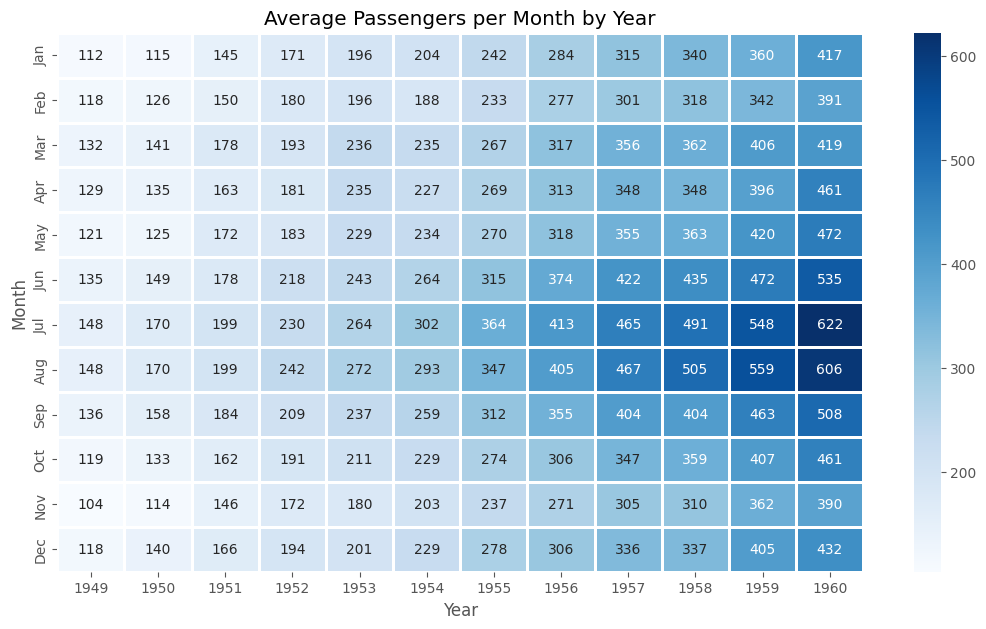

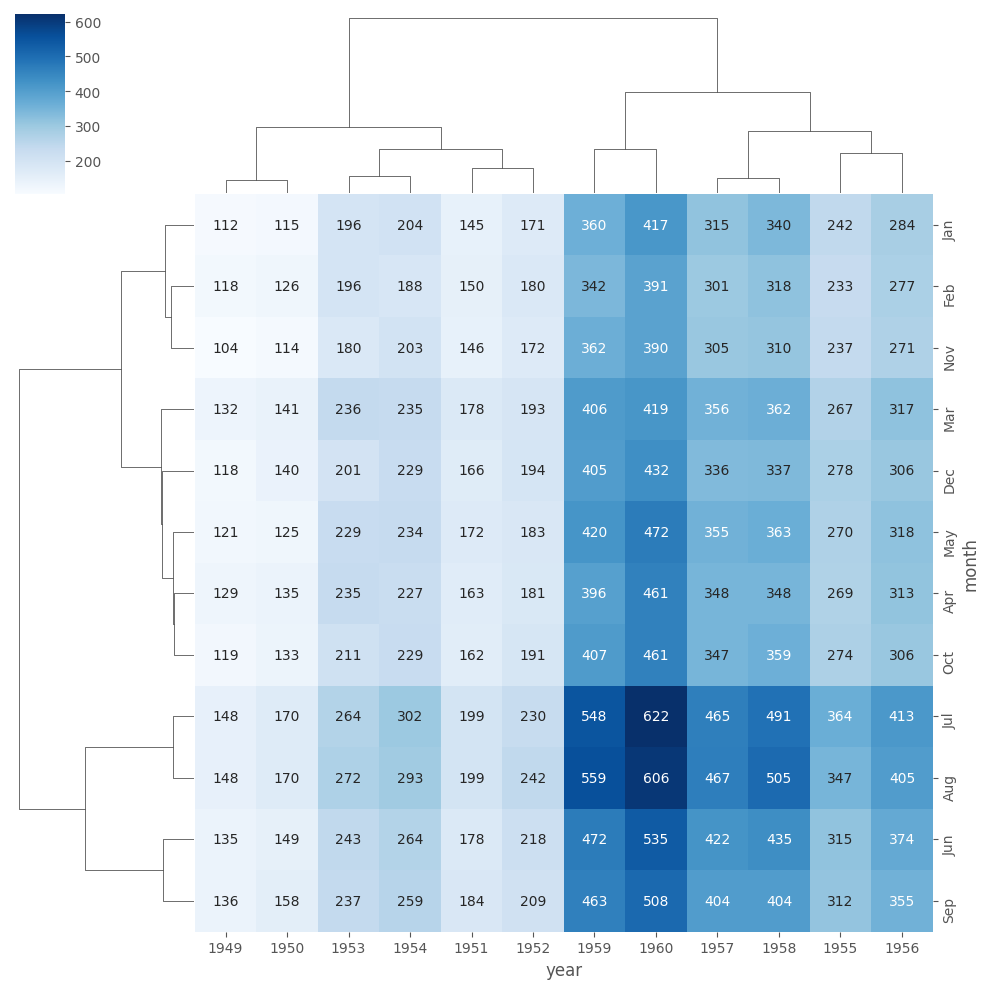

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load flights dataset
flights = sns.load_dataset("flights")

# Pivot data: months as rows, years as columns
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")

# Heatmap: Average passengers per month by year
plt.figure(figsize=(13, 7))
sns.heatmap(flights_pivot, annot=True, fmt=".0f", cmap="Blues", linecolor='white', linewidths=1)
plt.title("Average Passengers per Month by Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

# Clustermap: Visualize relationships
sns.clustermap(flights_pivot, cmap="Blues", annot=True, fmt=".0f")
plt.show()

## For questions 4-8:

For these qestions, an insurance dataset is used. You can get details from [here](https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health). And if you want this dataset to use directly, then you can use this link: **https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv**

### **`Q-4:`** Draw a scatter plot based on the below conditions:
1. x-axis should be "age" and y-axis should be "bmi".
2. For hue, size and style parameters use "diabetic", "gender" and "smoker" column respectively.
3. Add title to your chart.
4. Age should be less than 70 percentiles.
5. BMI should be greater than the average value of the filtered age dataset.

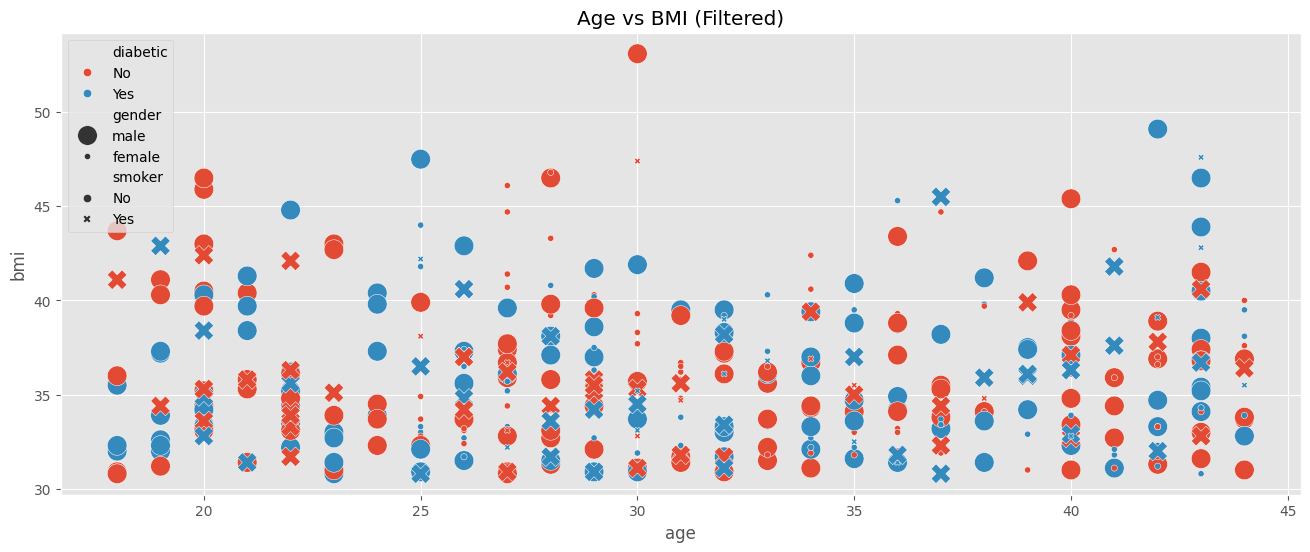

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df = pd.read_csv('insurance.csv')

# Filter age < 70th percentile and BMI > average BMI
df_filtered = df[df['age'] < df['age'].quantile(0.7)]
df_filtered = df_filtered[df_filtered['bmi'] > df_filtered['bmi'].mean()]

# Set figure size
plt.figure(figsize=(16, 6))

# Scatter plot
sns.scatterplot(data=df_filtered, x='age', y='bmi', hue='diabetic', size='gender', style='smoker', sizes=(20, 200))

# Set title
plt.title('Age vs BMI (Filtered)')

# Show the plot
plt.show()


### **`Q-5:`** Draw a line plot by using the below informations

1. bloodpressure vs children
2. Blood-pressure values should be between 90 and 100. The upper and lower limit are included.
3. Show the details of "smoker".

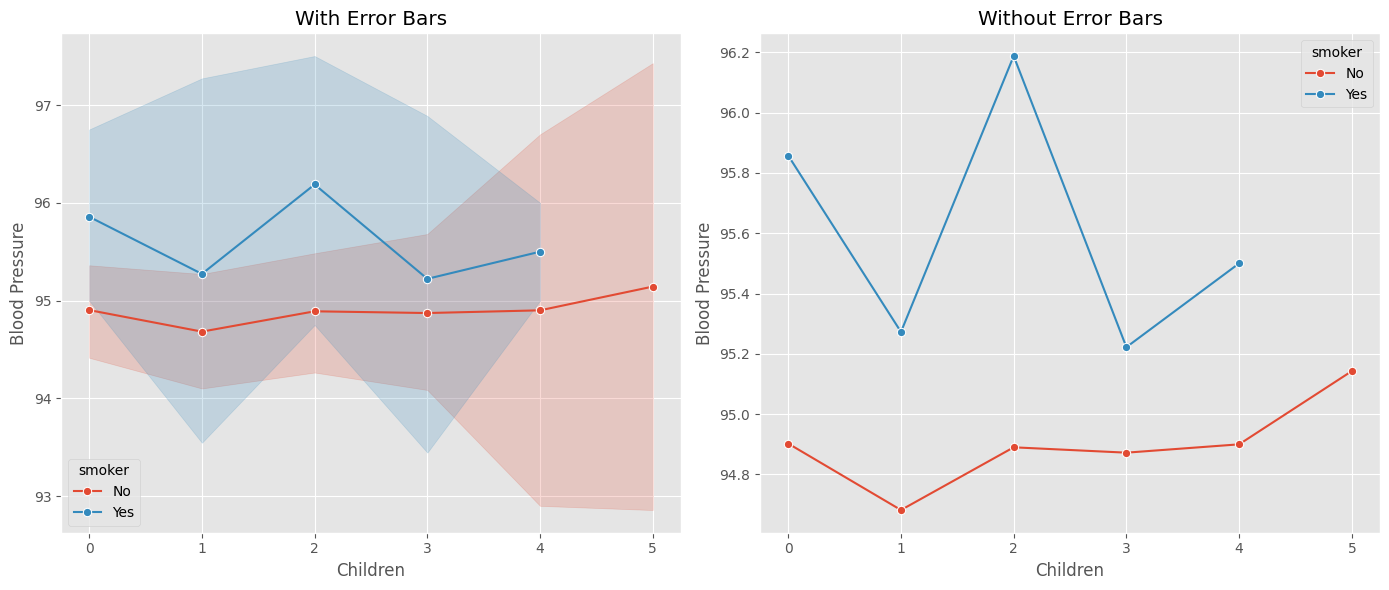

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter blood pressure between 90 and 100 (inclusive)
df_filtered = df[df['bloodpressure'].between(90, 100)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot with error bars (default behavior)
sns.lineplot(data=df_filtered, x='children', y='bloodpressure', hue='smoker', marker='o', ax=axes[0])
axes[0].set_title('With Error Bars')
axes[0].set_xlabel('Children')
axes[0].set_ylabel('Blood Pressure')

# Plot without error bars
sns.lineplot(data=df_filtered, x='children', y='bloodpressure', hue='smoker', marker='o', errorbar=None, ax=axes[1])
axes[1].set_title('Without Error Bars')
axes[1].set_xlabel('Children')
axes[1].set_ylabel('Blood Pressure')

plt.tight_layout()
plt.show()


### **`Q-6:`** Draw a histogram using displot

- based on "age" column.
- Show details of "smoker" (hue).
- Create 2 separate charts for the above 2 conditions based on "gender" side-by-side.

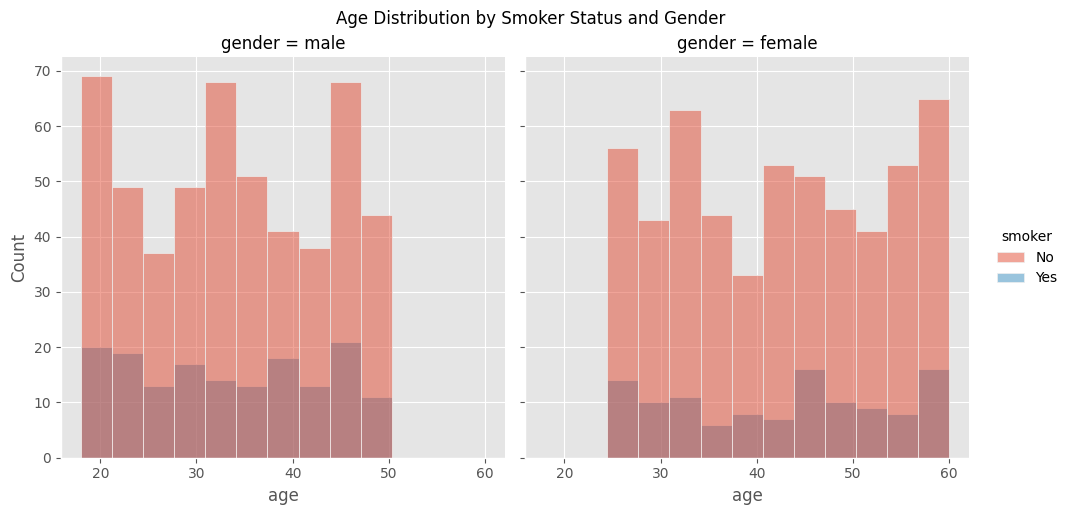

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create side-by-side histograms
sns.displot(data=df, x='age', hue='smoker', col='gender', height=5, aspect=1)
plt.suptitle('Age Distribution by Smoker Status and Gender', y=1.02)
plt.show()

### **`Q-7:`** Draw a kde plot between "age" and "bloodpressure".

<Axes: xlabel='age', ylabel='bloodpressure'>

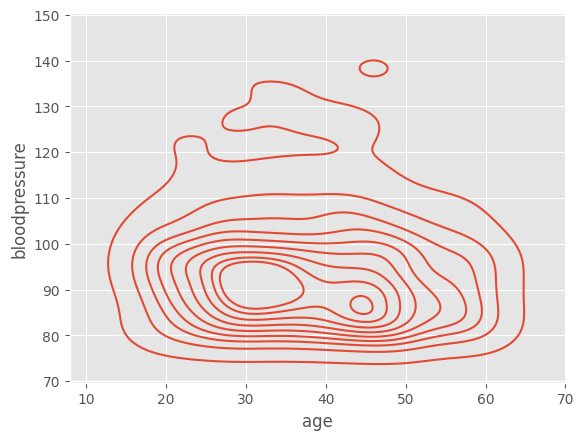

In [34]:
# code here
sns.kdeplot(data=df,x='age',y='bloodpressure')

### **`Q-8:`** Draw a clustermap between between "age", "bmi" and "bloodpressure".

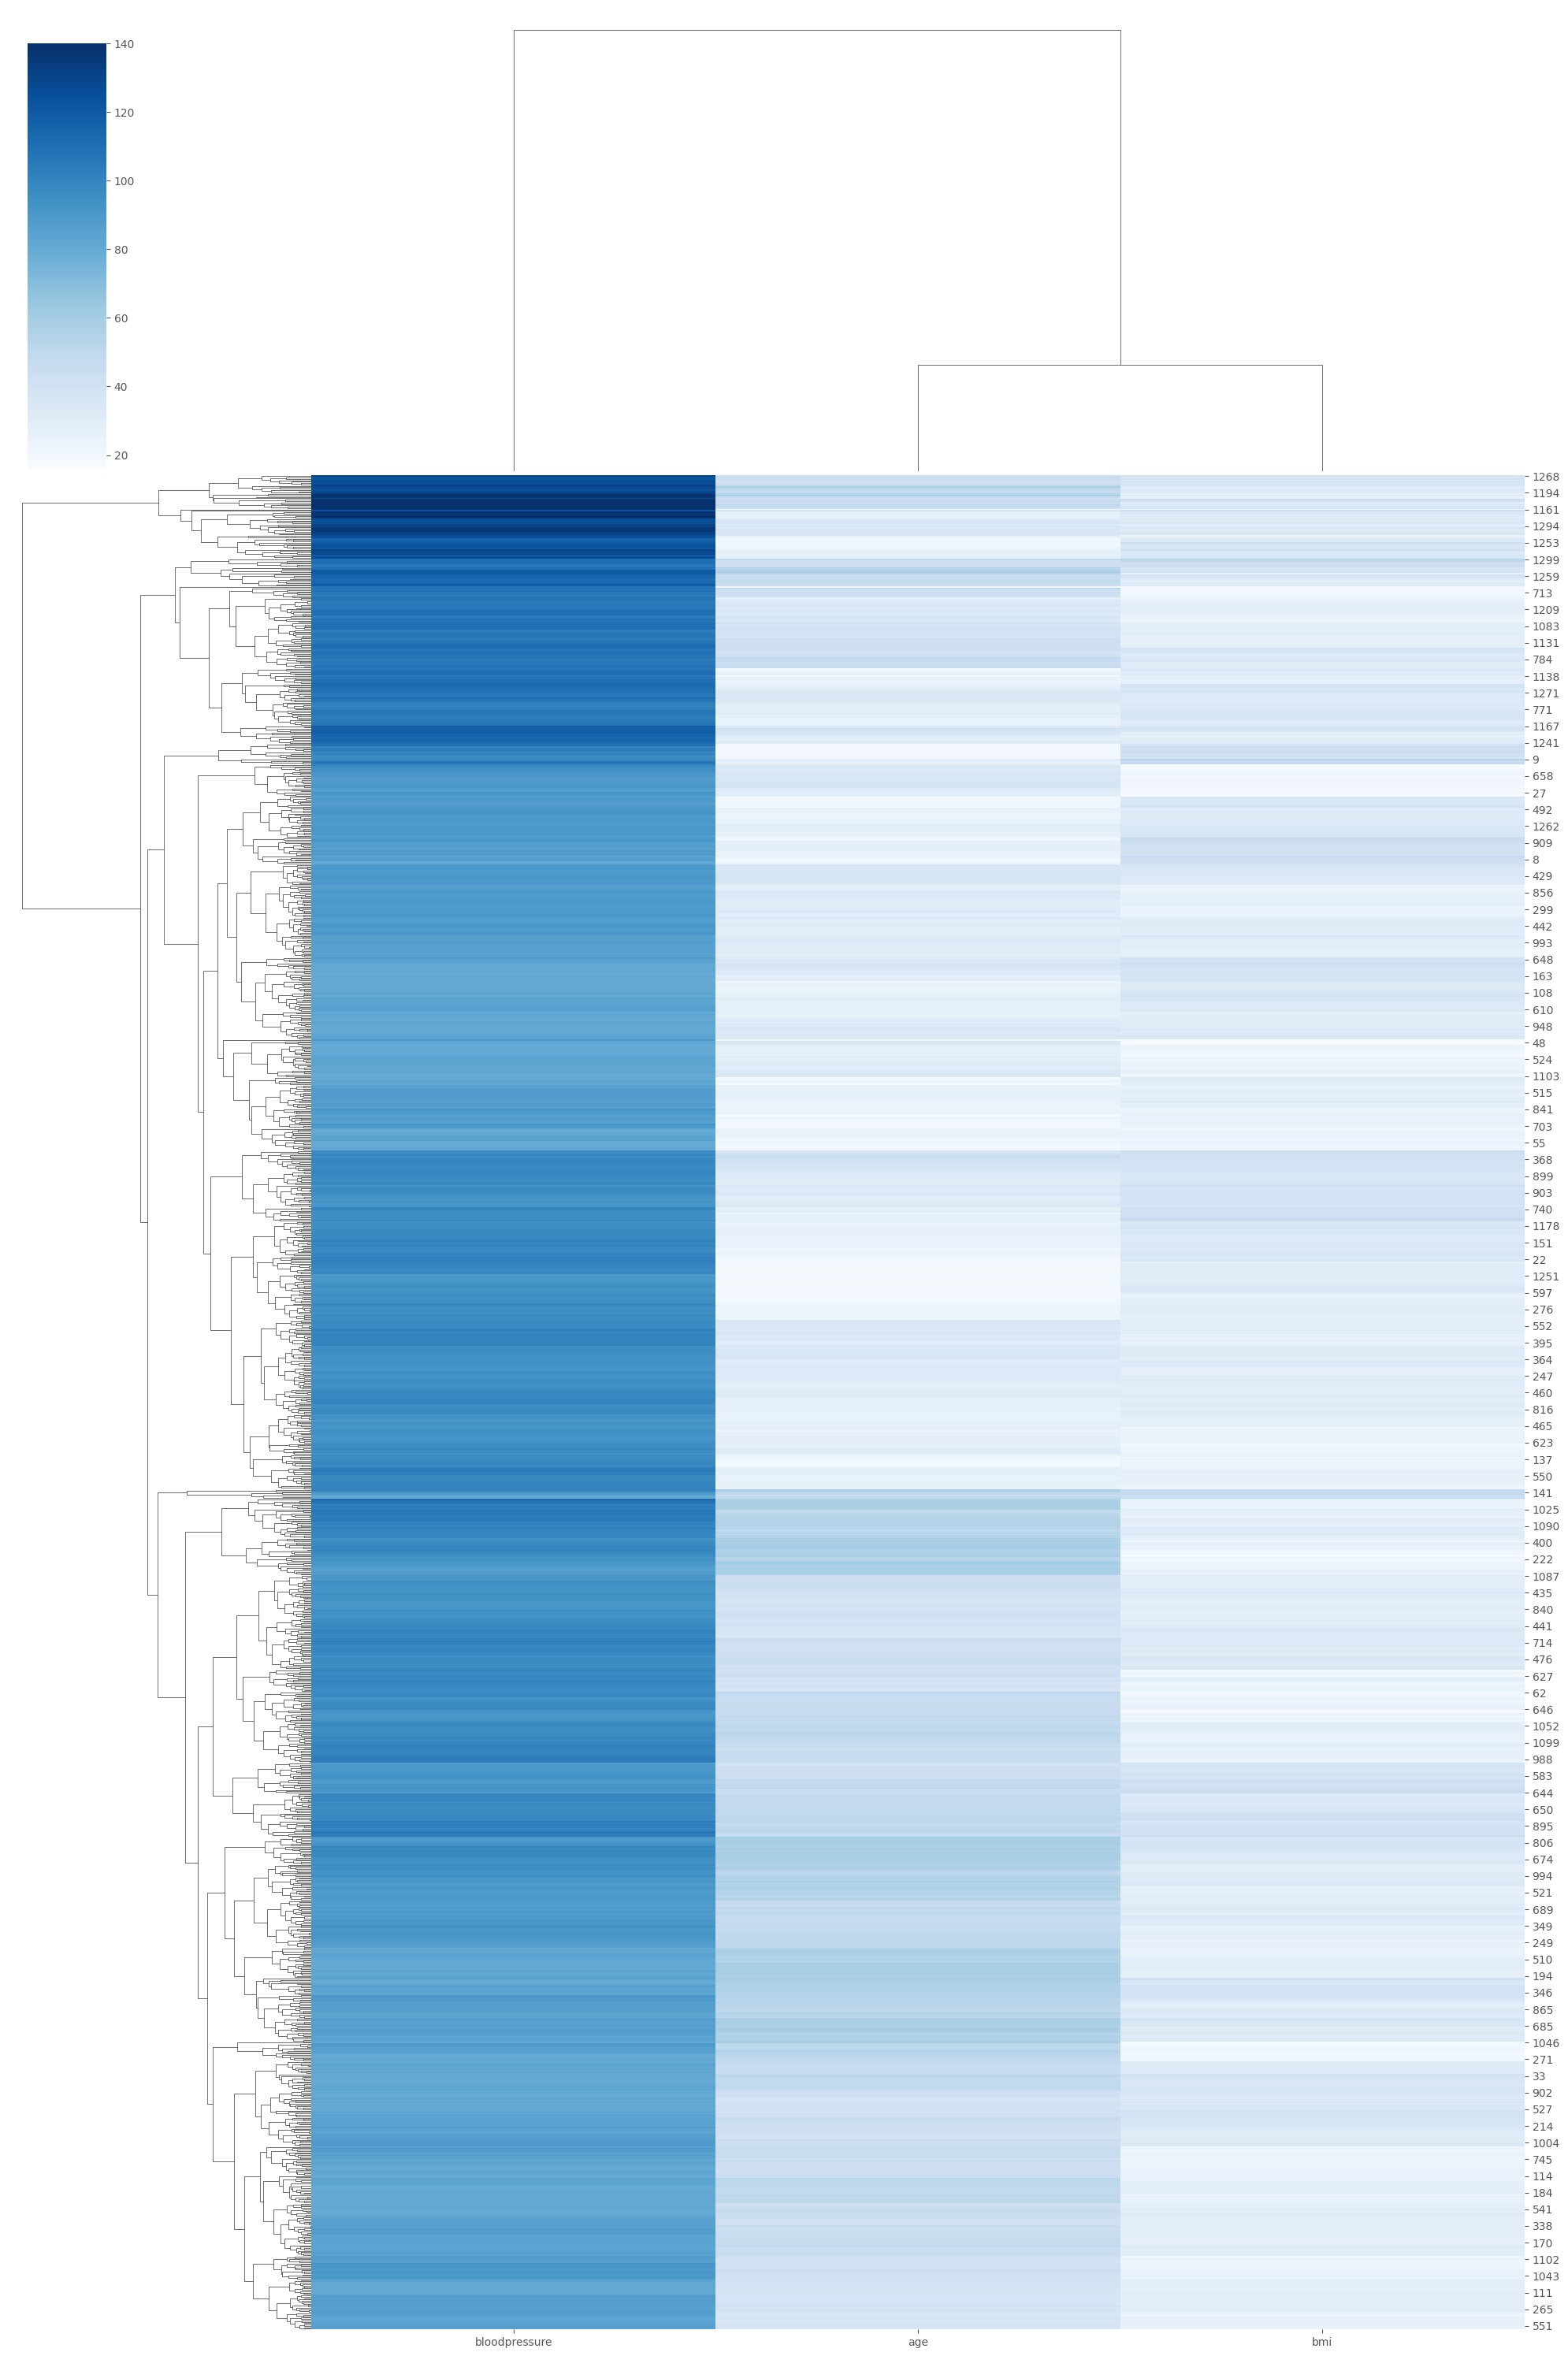

In [40]:
sns.clustermap(df[['age', 'bmi', 'bloodpressure']].dropna(), figsize=(20, 30), cmap='Blues')
